In [47]:
import pandas as pd
import random
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

#set the random seed as zero
np.random.seed(0)

In [48]:
#input data 
creditData=pd.read_csv('/Users/Mandy/Study/SpringBoard/Capstone 1/Data/Modified Dataset.csv', header=0)

In [49]:
#subset macro-economic data
limit_bal=creditData.iloc[:,1]
sex=creditData.iloc[:,2]
education=creditData.iloc[:,3]
marriage=creditData.iloc[:,4]
age=creditData.iloc[:,5]
pay_0=creditData.iloc[:,6]
pay_2=creditData.iloc[:,7]
pay_3=creditData.iloc[:,8]
pay_4=creditData.iloc[:,9]
pay_5=creditData.iloc[:,10]
pay_6=creditData.iloc[:,11]
bill_amt1=creditData.iloc[:,12]
bill_amt2=creditData.iloc[:,13]
bill_amt3=creditData.iloc[:,14]
bill_amt4=creditData.iloc[:,15]
bill_amt5=creditData.iloc[:,16]
bill_amt6=creditData.iloc[:,17]
pay_amt1=creditData.iloc[:,18]
pay_amt2=creditData.iloc[:,19]
pay_amt3=creditData.iloc[:,20]
pay_amt4=creditData.iloc[:,21]
pay_amt5=creditData.iloc[:,22]
pay_amt6=creditData.iloc[:,23]
interest_rate=creditData.iloc[:,24]
employed_persons=creditData.iloc[:,25]
cpi=creditData.iloc[:,26]
consumer_confidence=creditData.iloc[:,27]
default_next_month=creditData.iloc[:,28]


In [50]:
# randomly pick the monthly datas to each cells for economic datas

for index,rowValue in interest_rate.iteritems():
        interest_rate[index]=random.choice([1.88,2,2.13])

for index,rowValue in employed_persons.iteritems():
        employed_persons[index]=random.choice([9916,9929,9931,9933,9949,9969])
        
for index,rowValue in cpi.iteritems():
        cpi[index]=random.choice([92.02,92.53,92.82,93.9,94.6,94.73])

for index,rowValue in consumer_confidence.iteritems():
        consumer_confidence[index]=random.choice([73.15,73.06,74.79,73.15,73.38,71.42])


In [51]:
#Data Exploration
default_next_month.value_counts()

0    23364
1     6636
Name: Default_Next_Month, dtype: int64

In [52]:
creditData.groupby('Default_Next_Month').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence
Default_Next_Month,,,,,,,,,,,,,,,,,,,,,
0,15064.893982,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,...,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769,1.662601,9937.814030,92.835773,72.831279
1,14773.781947,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,...,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.671338,9937.736287,92.841772,72.841923


In [53]:
creditData.groupby('SEX').mean()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
SEX,,,,,,,,,,,,,,,,,,,,,
1,14802.770104,163519.825034,1.839250,1.572090,36.519431,0.063257,-0.029189,-0.068557,-0.133832,-0.189182,...,5960.720138,5412.506057,4869.177995,4830.827052,5276.196753,1.659741,9937.761524,92.835801,72.829744,0.241672
2,15130.282078,170086.462014,1.862246,1.538593,34.806868,-0.069181,-0.202407,-0.230289,-0.277661,-0.316751,...,5895.200088,5103.057255,4797.786992,4778.752043,5175.665305,1.667679,9937.820009,92.837953,72.836186,0.207763


In [54]:
creditData.groupby('MARRIAGE').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
MARRIAGE,,,,,,,,,,,,,,,,,,,,,
0,15755.796296,132962.962963,1.740741,2.740741,37.814815,-0.166667,-0.203704,-0.203704,-0.370370,-0.407407,...,2781.944444,4027.944444,2864.222222,2124.518519,2238.388889,1.685185,9938.296296,92.703704,73.166667,0.092593
1,15253.288821,182200.893184,1.620031,1.985138,40.016692,-0.036752,-0.163262,-0.206238,-0.259243,-0.308441,...,6205.714401,5328.491983,5075.922469,4836.070503,5331.664836,1.665861,9937.563145,92.837031,72.828611,0.234717
2,14807.277813,156413.660737,1.589514,1.729454,31.452706,-0.002819,-0.111000,-0.135680,-0.191118,-0.232085,...,5648.984465,5123.063518,4612.971185,4781.813581,5162.734340,1.663117,9937.994112,92.837572,72.835192,0.209283
3,13734.154799,98080.495356,1.594427,2.235294,42.798762,0.170279,0.000000,0.024768,-0.024768,-0.142415,...,7865.136223,6150.086687,5121.179567,4563.919505,3408.987616,1.674923,9937.845201,92.839009,72.913313,0.260062


In [55]:
creditData.groupby('Interest_Rate').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
Interest_Rate,,,,,,,,,,,,,,,,,,,,,
1,14940.229531,168397.623211,1.598072,1.850855,1.553557,35.440779,-0.011129,-0.128378,-0.161467,-0.218899,...,5634.068064,5666.701411,5059.617647,4685.043025,4726.082870,5160.288752,9937.757452,92.839825,72.834261,0.216713
2,15030.925461,167023.274478,1.606591,1.854284,1.551013,35.508076,-0.019512,-0.136487,-0.168589,-0.221559,...,5678.478832,6049.619884,5309.513092,4897.272923,4836.393008,5243.375351,9937.816713,92.835724,72.833317,0.223465


In [56]:
creditData.groupby('Employed_Persons').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,CPI,Consumer_Confidence,Default_Next_Month
Employed_Persons,,,,,,,,,,,,,,,,,,,,,
9916,15024.778943,167688.501880,1.599644,1.848209,1.543440,35.275084,0.000198,-0.122501,-0.145854,-0.211755,...,5704.861864,5561.167227,5450.617455,4726.257669,4565.390857,5469.115179,1.660993,92.828419,72.820107,0.229567
9929,14854.348373,168927.929726,1.618487,1.850868,1.546616,35.496706,-0.032342,-0.153124,-0.185067,-0.238571,...,5380.208026,5960.085247,5215.114394,4910.676981,4901.901577,5450.646436,1.670194,92.837692,72.850070,0.218207
9931,14848.055369,167203.152709,1.588177,1.858128,1.558818,35.557635,-0.020099,-0.128867,-0.163153,-0.219310,...,5482.100690,5677.388374,4681.380887,4546.640394,4719.617143,5058.387389,1.670148,92.839015,72.840197,0.216158
9933,14864.876303,165756.221632,1.606624,1.855653,1.544878,35.692496,-0.039460,-0.149458,-0.192190,-0.232877,...,5753.335923,5872.359027,5375.077489,4379.612554,4861.428338,4738.526273,1.655694,92.829278,72.845839,0.221836
9949,15231.695556,168589.898990,1.605859,1.848081,1.552323,35.611515,-0.024646,-0.148889,-0.185455,-0.231515,...,6033.560606,6381.897576,5406.942626,5577.502020,5271.521010,5366.529697,1.663434,92.836768,72.821616,0.217374
9969,15180.102947,166716.447630,1.603943,1.857826,1.564914,35.287336,0.015333,-0.100558,-0.126643,-0.190562,...,5635.988451,6084.311629,5235.780366,4818.682796,4487.405814,5200.234966,1.666468,92.851254,72.824174,0.224014


In [57]:
creditData.groupby('CPI').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,Consumer_Confidence,Default_Next_Month
CPI,,,,,,,,,,,,,,,,,,,,,
92,14998.998929,168339.382576,1.603027,1.859573,1.550325,35.431193,-0.013460,-0.129579,-0.171365,-0.217371,...,5628.857028,5967.368044,5214.658608,4979.854483,4731.402263,5163.168218,1.663765,9937.690216,72.828300,0.218978
93,14892.567616,167050.388369,1.604860,1.854810,1.557857,35.536945,-0.027086,-0.131249,-0.162119,-0.242780,...,5521.544911,5824.654650,5289.822545,4339.679347,4877.613224,4905.985859,1.674567,9937.784306,72.830313,0.228241
94,15056.675990,166430.189130,1.604221,1.842723,1.551165,35.540514,-0.016325,-0.141250,-0.160561,-0.214513,...,5786.185148,5900.717400,5210.008859,4840.594167,4861.348099,5447.992335,1.660661,9937.961577,72.843221,0.220983


In [58]:
creditData.groupby('Consumer_Confidence').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Default_Next_Month
Consumer_Confidence,,,,,,,,,,,,,,,,,,,,,
71,14853.632809,163536.880290,1.599960,1.848045,1.548972,35.321846,-0.026401,-0.120516,-0.158404,-0.219065,...,5713.372632,5799.751310,5276.571745,4685.026602,4725.967755,5138.359936,1.663039,9937.988714,92.834744,0.215437
73,15029.435563,168408.041781,1.604228,1.856901,1.551107,35.498383,-0.016314,-0.137279,-0.170405,-0.227307,...,5552.829246,5747.461875,5134.814673,4815.989256,4828.026809,5246.848097,1.665954,9937.749067,92.830092,0.222731
74,15030.300426,167690.249341,1.605514,1.842895,1.557876,35.597608,-0.008514,-0.132779,-0.156902,-0.195216,...,6064.874924,6751.230083,5544.830124,5009.069532,4756.516927,5165.346442,1.660247,9937.798500,92.868032,0.220758


In [59]:
creditData['x_bin']=pd.cut(x=creditData.AGE, bins=[20,30,40,50,60,70]) 

Text(0,0.5,'Frequency')

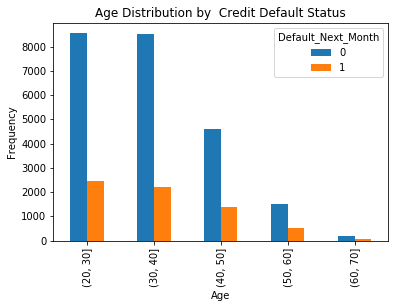

In [60]:
%matplotlib inline
#bar chart of age grouped by default
pd.crosstab(creditData.x_bin,default_next_month).plot(kind='bar')
plt.title('Age Distribution by  Credit Default Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [61]:
#Separate the dataset into dependent and independent variables
X=creditData.drop('Default_Next_Month',axis=1)
X=X.drop('ID',axis=1)
X=X.drop('x_bin',axis=1) 
y=creditData['Default_Next_Month']

#then seperate it into training set, validation set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.15)
 

In [62]:
#######MODEL ONE: LOGISTIC REGRESSION MODEL######
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
#10-fold cross-validation,if the evaluation score suggests not overfitting, predict the default status for each sample in test set
LR_cross_val_scores = cross_val_score(LR_classifier,X_train,y_train,scoring='accuracy',cv=10)
print("The 10 fold cross validation score based on Logistic Regression Model is: ",'%.3f'%LR_cross_val_scores.mean())

if LR_cross_val_scores.mean() >0.97:
    print (" The Logistic Regression Model is overfitting in this case.")
else:
    LR_predicted=LR_classifier.predict(X_test)
    #generate default probabilities based on test set
    LR_prob_default=np.sum(LR_predicted)/len(LR_predicted)
    print("The Default Probability based on Logistic Regression Model is :",'%.3f'%LR_prob_default)
    LR_accuracy=LR_classifier.score(X_test,y_test)
    print("The accuracy of Logistic Regression Model on test set is : ",'%.3f'%LR_accuracy)
    print(metrics.confusion_matrix(y_test,LR_predicted))
    print (metrics.classification_report(y_test,LR_predicted))
    

The 10 fold cross validation score based on Logistic Regression Model is:  0.778
The Default Probability based on Logistic Regression Model is : 0.000
The accuracy of Logistic Regression Model on test set is :  0.784
[[3529    0]
 [ 971    0]]
             precision    recall  f1-score   support

          0       0.78      1.00      0.88      3529
          1       0.00      0.00      0.00       971

avg / total       0.62      0.78      0.69      4500



/Users/Mandy/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
#create a dataframe to store evaluation info of different models
evaluation = pd.DataFrame({'Model':['Logistic Regression'],'Default_Probability':[LR_prob_default],'Cross_Validation_Accuracy':[LR_cross_val_scores.mean()],'Test_Accuracy':[LR_accuracy]})
print(evaluation)

   Cross_Validation_Accuracy  Default_Probability                Model  \
0                   0.777765                  0.0  Logistic Regression   

   Test_Accuracy  
0       0.784222  


In [65]:
#########MODEL TWO: RANDOM FOREST MODEL#########
RF_classifier = RandomForestClassifier(random_state=0)

In [66]:
# 10 Fold Cross Validation over the entire training set
kf=KFold(n_splits=10,shuffle=False)
RF_cross_val_score=0
for train_index, test_index in kf.split(X_train):
    X_train_subset, X_test_subset=X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_subset, y_test_subset=y_train.iloc[train_index],y_train.iloc[test_index]
    RF_classifier.fit(X_train_subset,y_train_subset)
    RF_cross_val_score=RF_cross_val_score+RF_classifier.score(X_test_subset,y_test_subset)
RF_cross_val_score=RF_cross_val_score/10
print("The 10 fold cross validation score based on Random Forest Model is: ",'%.3f'%RF_cross_val_score)

The 10 fold cross validation score based on Random Forest Model is:  0.804


In [67]:
# if the score is less than 0.975, then build the classifier with the entire training set
if RF_cross_val_score >0.97:
    print (" The Random Forest Model is overfitting in this case.")
else:
    RF_classifier.fit(X_train,y_train)
    RF_predicted=RF_classifier.predict(X_test)
    RF_prob_default=np.sum(RF_predicted)/len(RF_predicted)
    print("The Default Probability based on Random Forest Model is :",'%.3f'%RF_prob_default)
    RF_accuracy=RF_classifier.score(X_test,y_test)
    print("The accuracy of Random Forest Model on test set is : ",'%.3f'%RF_accuracy)
    print(metrics.confusion_matrix(y_test,RF_predicted))
    print(metrics.classification_report(y_test,RF_predicted))

The Default Probability based on Random Forest Model is : 0.108
The accuracy of Random Forest Model on test set is :  0.813
[[3349  180]
 [ 663  308]]
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      3529
          1       0.63      0.32      0.42       971

avg / total       0.79      0.81      0.79      4500



In [68]:
features_weight=RF_classifier.fit(X_test,y_test).feature_importances_
feature_index = np.where(features_weight==max(features_weight))
feature_index=int(feature_index[0][0])
print("The most important feature is:",(list(X_test)[feature_index]))

The most important feature is: PAY_0


In [69]:
#output the result into the existing evaluation dataframe to compare with other model
new_evaluation=pd.DataFrame({'Model':["Random Forest"],'Default_Probability':[RF_prob_default],'Cross_Validation_Accuracy':[RF_cross_val_score],'Test_Accuracy':[RF_accuracy]})
evaluation = evaluation.append(new_evaluation)
print(evaluation)

   Cross_Validation_Accuracy  Default_Probability                Model  \
0                   0.777765             0.000000  Logistic Regression   
0                   0.804235             0.108444        Random Forest   

   Test_Accuracy  
0       0.784222  
0       0.812667  
